<a href="https://colab.research.google.com/github/03axdov/Notebooks/blob/main/Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

print(tf.__version__)

2.8.2


In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(
    origin=dataset_url,
    fname='flower_photos',
    untar=True
)

data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 12s 0us/step


In [3]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


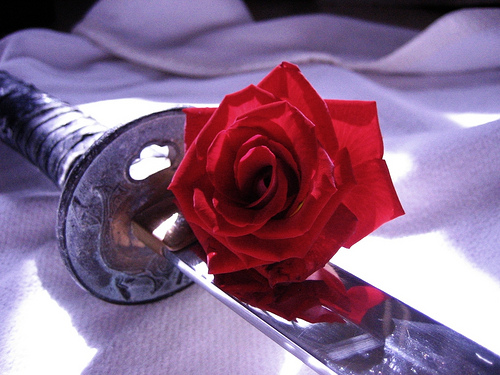

In [5]:
roses = list(data_dir.glob('roses/*.jpg'))
PIL.Image.open(roses[0])

In [6]:
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH)
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


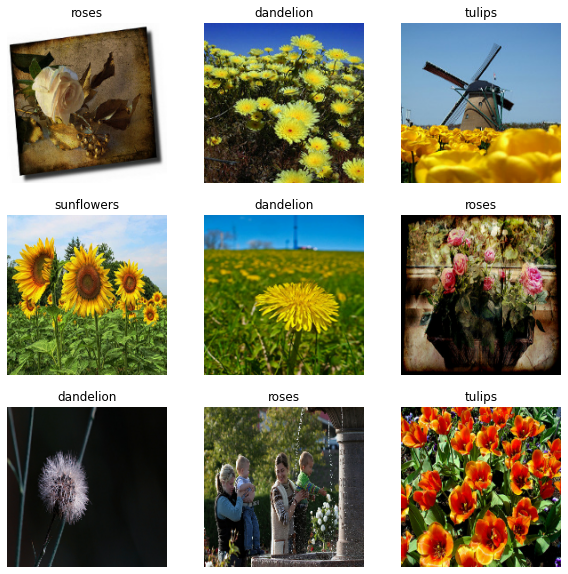

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [12]:
# normalization_layer = tf.keras.layers.Rescaling(1 / 255.0)

In [13]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# print(np.min(first_image), np.max(first_image))

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
num_classes = 5
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1 / 255.0),

    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(num_classes)
])

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [23]:
model.build((32, 180, 180, 3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (32, 180, 180, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (32, 178, 178, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (32, 89, 89, 32)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (32, 87, 87, 32)          9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 43, 43, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (32, 41, 41, 32)         

In [18]:
print(tf.__version__)

2.8.2


In [19]:
print(f"Num GPUs available: {len(tf.config.list_physical_devices('GPU'))}")

Num GPUs available: 1


In [27]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
92/92 [==============================] - 3s 30ms/step - loss: 1.4041 - accuracy: 0.3941 - val_loss: 1.3020 - val_accuracy: 0.3992
Epoch 2/5
92/92 [==============================] - 3s 28ms/step - loss: 1.1475 - accuracy: 0.5208 - val_loss: 1.1941 - val_accuracy: 0.4864
Epoch 3/5
92/92 [==============================] - 3s 28ms/step - loss: 1.0664 - accuracy: 0.5719 - val_loss: 1.1058 - val_accuracy: 0.5450
Epoch 4/5
92/92 [==============================] - 3s 28ms/step - loss: 1.0058 - accuracy: 0.6131 - val_loss: 1.0723 - val_accuracy: 0.5640
Epoch 5/5
92/92 [==============================] - 3s 28ms/step - loss: 0.9574 - accuracy: 0.6281 - val_loss: 1.0344 - val_accuracy: 0.5763


In [28]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [29]:
for f in list_ds.take(5):
  print(f.numpy())

b'/root/.keras/datasets/flower_photos/roses/410425647_4586667858.jpg'
b'/root/.keras/datasets/flower_photos/roses/1801614110_bb9fa46830.jpg'
b'/root/.keras/datasets/flower_photos/dandelion/4514343281_26781484df.jpg'
b'/root/.keras/datasets/flower_photos/sunflowers/18972803569_1a0634f398_m.jpg'
b'/root/.keras/datasets/flower_photos/sunflowers/8929288228_6795bcb1fe.jpg'


In [30]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [31]:
print(list_ds)

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


In [32]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [33]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

2936
734


In [39]:
def get_label(file_path):
  parts = tf.strings.split(file_path, os.path.sep)
  one_hot = parts[-2] == class_names
  return tf.argmax(one_hot)

In [35]:
def decode_img(img):
  img = tf.io.decode_jpeg(img, channels=3)
  return tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

In [36]:
def process_path(file_path):
  label = get_label(file_path)

  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [40]:
train_ds = train_ds.map(process_path, num_parallel_calls = AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [41]:
for image, label in train_ds.take(1):
  print(f"Image shape: {image.numpy().shape}")
  print(f"Label: {label}")

Image shape: (180, 180, 3)
Label: 1


In [43]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

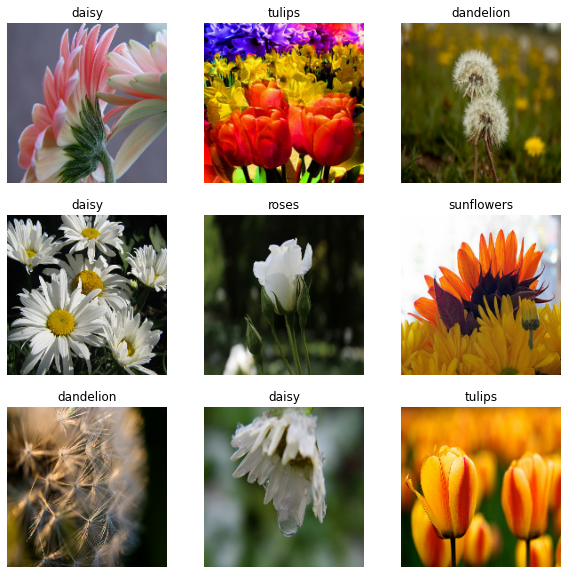

In [44]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

In [45]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3
92/92 [==============================] - 11s 106ms/step - loss: 0.9105 - accuracy: 0.6550 - val_loss: 0.9368 - val_accuracy: 0.6431
Epoch 2/3
92/92 [==============================] - 3s 31ms/step - loss: 0.8656 - accuracy: 0.6700 - val_loss: 0.9192 - val_accuracy: 0.6540
Epoch 3/3
92/92 [==============================] - 3s 32ms/step - loss: 0.8063 - accuracy: 0.7030 - val_loss: 0.8697 - val_accuracy: 0.6785


In [47]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True
)

In [48]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


In [49]:
print(metadata.features['label'])

ClassLabel(shape=(), dtype=tf.int64, num_classes=5)


tf.Tensor(2, shape=(), dtype=int64)


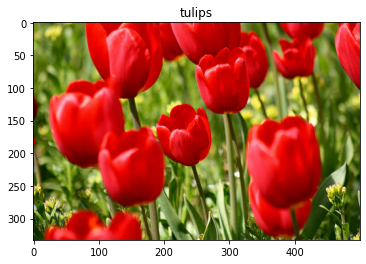

In [56]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
print(label)
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [57]:
train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
test_ds = configure_for_performance(test_ds)